# CSE151A - HW7: Binary Perceptron and SVM Classification

In this notebook, we will implement the Binary Perceptron algorithm and Support Vector Machine for classifying the Iris dataset.

## 1. Import Required Libraries

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random

# For prettier plots
plt.style.use('ggplot')
%matplotlib inline

## 2. Define Perceptron Functions

### (a) Implementing the Binary Perceptron algorithm

The Perceptron algorithm follows these steps:
1. Initialize weights vector w = 0 and bias b = 0
2. Keep cycling through the training data (x, y):
   - If y(w · x + b) ≤ 0 (i.e., point is misclassified):
     - Update w = w + yx
     - Update b = b + y
3. Continue until all points are classified correctly or maximum iterations reached

In [79]:
def classifier(w, b, x):
   result = np.dot(w, x) + b
   if result > 0:
      return 1
   else:
      return -1

In [80]:
def perceptron_run(X, y):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    
    import random
    random.seed(42)
    indices = list(range(n_samples))
    random.shuffle(indices)  # randomize indices list

    converged = False
    k = 0  # updates counter
    
    while not converged:
        converged = True
        
        for i in indices:
            x_i = X[i]
            y_i = y[i]
            
            # if the point is misclassified: y(w · x + b) ≤ 0
            if y_i * (np.dot(w, x_i) + b) <= 0:
                w = w + y_i * x_i
                b = b + y_i
                converged = False
        k += 1

    return w, b, k

## 3. Load and Preprocess Iris Dataset for Perceptron

### (b) Loading the Iris dataset and preprocessing it

In [81]:
# Load the Iris dataset
iris = datasets.load_iris()
X_full = iris.data
y_full = iris.target

# Restrict to features 1 and 3 (sepal width and petal width - 0-indexed)
X = X_full[:, [1, 3]]

# Restrict to labels 0 and 1
mask = np.logical_or(y_full == 0, y_full == 1)
X_binary = X[mask]
y_binary = y_full[mask]

# Recode label 0 as -1
y_binary = np.where(y_binary == 0, -1, 1)

# Display the first few samples
pd.DataFrame({
    'sepal_width': X_binary[:, 0],
    'petal_width': X_binary[:, 1],
    'label': y_binary
}).head()

,sepal_width,petal_width,label
0,3.5,0.2,-1
1,3.0,0.2,-1
2,3.2,0.2,-1
3,3.1,0.2,-1
4,3.6,0.2,-1


## 4. Run Perceptron Algorithm and Visualize Results

### (c) Running the perceptron algorithm and visualizing the decision boundary

Learned weights (w): [-1.6  7. ]
Learned bias (b): 1
Iterations needed: 3
Accuracy: 1.0000


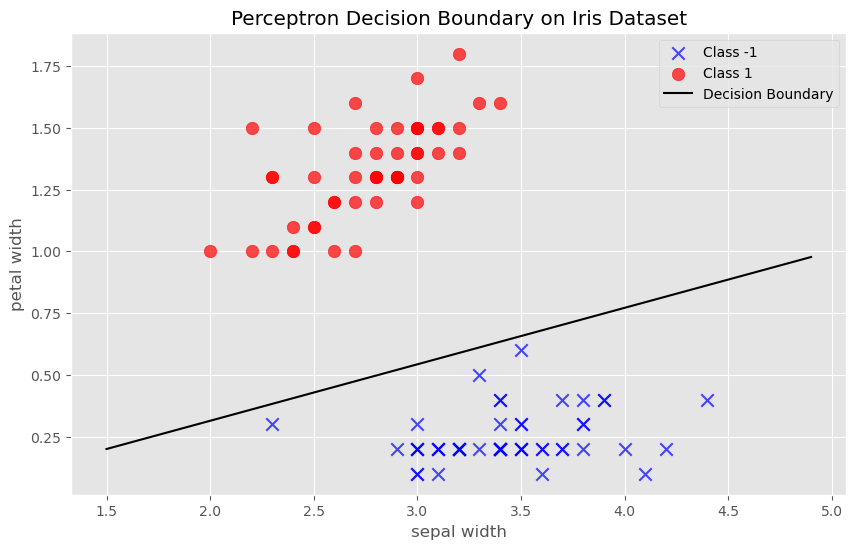

In [82]:
# Train the perceptron
w, b, iterations = perceptron_run(X_binary, y_binary)

# Print the learned parameters
print(f"Learned weights (w): {w}")
print(f"Learned bias (b): {b}")
print(f"Iterations needed: {iterations}")

# Calculate accuracy
y_pred = np.array([classifier(w, b, x) for x in X_binary])
accuracy = accuracy_score(y_binary, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Visualize the data points and decision boundary
plt.figure(figsize=(10, 6))

# Plot the data points
for label, marker, color in zip([-1, 1], ['x', 'o'], ['blue', 'red']):
    mask = y_binary == label
    plt.scatter(X_binary[mask, 0], X_binary[mask, 1], c=color, marker=marker, 
               label=f"Class {label}", alpha=0.7, s=80)

# Plot the decision boundary
# The decision boundary is defined by w[0]*x + w[1]*y + b = 0
# We can rewrite this as y = (-w[0]*x - b) / w[1]
if w[1] != 0:
    x_range = np.linspace(np.min(X_binary[:, 0]) - 0.5, np.max(X_binary[:, 0]) + 0.5, 100)
    boundary_y = (-w[0] * x_range - b) / w[1]
    plt.plot(x_range, boundary_y, 'k-', label="Decision Boundary")

plt.title('Perceptron Decision Boundary on Iris Dataset')
plt.legend()
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.grid(True)
plt.show()

## 5. Count Perceptron Updates and Plot Histogram

### (d) Modifying the code to count updates and plot a histogram

In [83]:
def train_perceptron_with_counter(X, y, max_iterations=1000):
    """
    Train a perceptron classifier and count the number of updates.
    
    Parameters:
    X: array of data points
    y: array of labels (+1 or -1)
    max_iterations: maximum number of passes through the dataset
    
    Returns:
    w: weight vector
    b: bias term
    updates: number of updates made during training
    """
    n_samples, n_features = X.shape
    
    # Initialize weights and bias
    w = np.zeros(n_features)
    b = 0
    updates = 0  # Initialize update counter
    
    # Create a list of indices and randomly permute it
    indices = list(range(n_samples))
    random.shuffle(indices)
    
    # Training loop
    converged = False
    iteration = 0
    
    while not converged and iteration < max_iterations:
        converged = True
        
        # Iterate through all samples in random order
        for i in indices:
            x_i = X[i]
            y_i = y[i]
            
            # Check if the point is misclassified: y(w · x + b) ≤ 0
            if y_i * (np.dot(w, x_i) + b) <= 0:
                # Update weights and bias
                w = w + y_i * x_i
                b = b + y_i
                converged = False
                updates += 1  # Count this update
                
        iteration += 1
        
        # Reshuffle indices for next iteration
        random.shuffle(indices)
    
    return w, b, updates

Run 1: 2 updates
Run 2: 9 updates
Run 3: 4 updates
Run 4: 2 updates
Run 5: 19 updates
Run 6: 4 updates
Run 7: 21 updates
Run 8: 25 updates
Run 9: 8 updates
Run 10: 8 updates
Run 11: 15 updates
Run 12: 11 updates
Run 13: 12 updates
Run 14: 17 updates
Run 15: 17 updates
Run 16: 13 updates
Run 17: 2 updates
Run 18: 23 updates
Run 19: 11 updates
Run 20: 2 updates


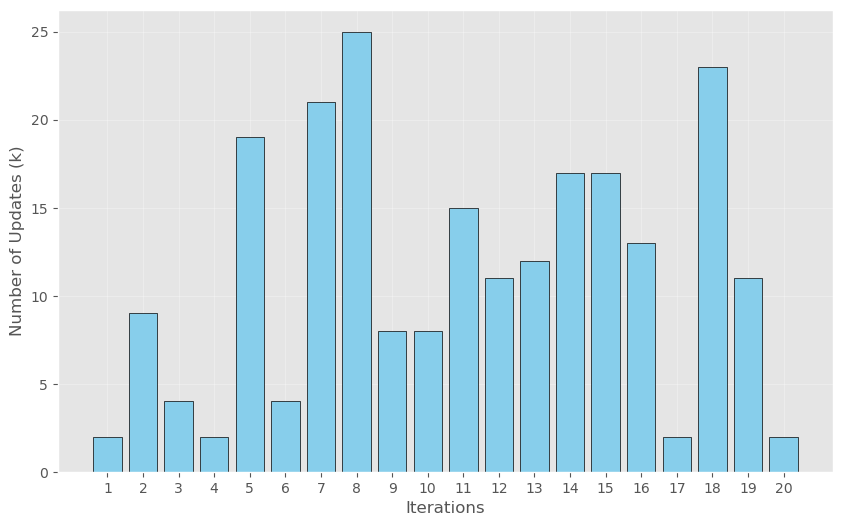

Mean number of updates: 11.25
Minimum number of updates: 2
Maximum number of updates: 25


In [84]:
# Run the perceptron algorithm 20 times
n_runs = 20
update_counts = []

for i in range(n_runs):
    # Set different random seed for each run to ensure different shuffling
    random.seed(i)
    _, _, updates = train_perceptron_with_counter(X_binary, y_binary)
    update_counts.append(updates)
    print(f"Run {i+1}: {updates} updates")

# Plot histogram of update counts
plt.figure(figsize=(10, 6))

# Create a bar plot instead of histogram to show iterations vs updates
plt.bar(range(1, n_runs+1), update_counts, color='skyblue', edgecolor='black')
plt.xlabel('Iterations')
plt.ylabel('Number of Updates (k)')
plt.xticks(range(1, n_runs+1))
plt.grid(True, alpha=0.3)
plt.show()

# Print statistics
print(f"Mean number of updates: {np.mean(update_counts):.2f}")
print(f"Minimum number of updates: {np.min(update_counts)}")
print(f"Maximum number of updates: {np.max(update_counts)}")

## 6. Load and Preprocess Iris Dataset for SVM

### 8(a) Checking if data is linearly separable

In [85]:
# Load the Iris dataset (again, for clarity)
iris = datasets.load_iris()
X_full = iris.data
y_full = iris.target

# Restrict to features 0 and 2 (sepal length and petal length - 0-indexed)
X_svm = X_full[:, [0, 2]]

# Restrict to labels 1 and 2
mask = np.logical_or(y_full == 1, y_full == 2)
X_svm = X_svm[mask]
y_svm = y_full[mask]

# Display the first few samples
pd.DataFrame({
    'sepal_length': X_svm[:, 0],
    'petal_length': X_svm[:, 1],
    'label': y_svm
}).head()

,sepal_length,petal_length,label
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


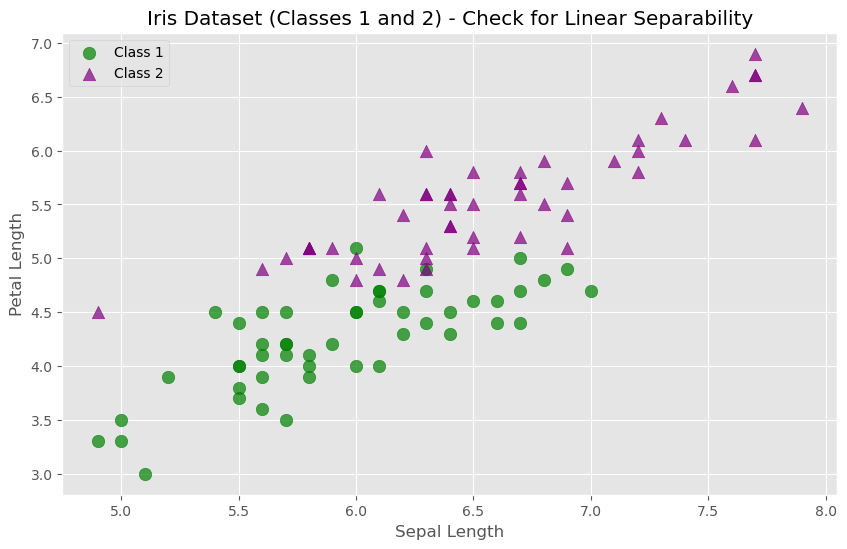

Training accuracy with linear SVM: 0.9500
Training error with linear SVM: 0.0500
The data is not perfectly linearly separable. 5 points are misclassified.


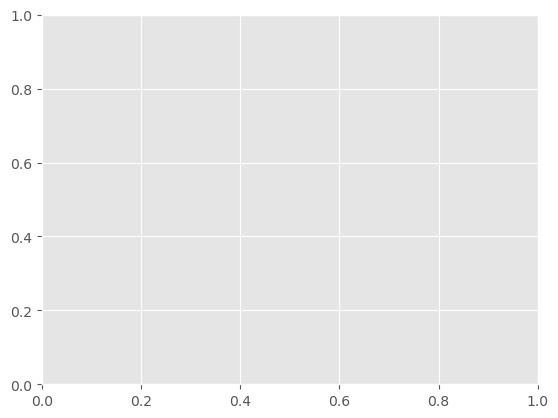

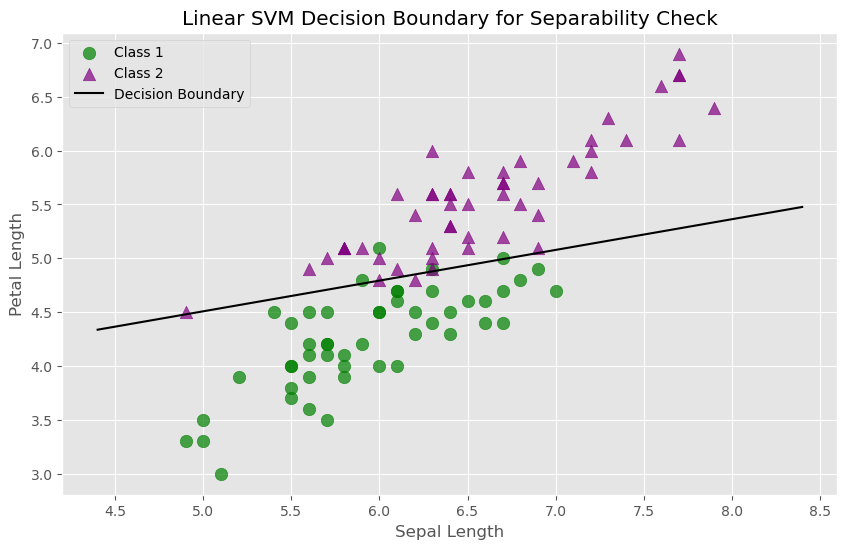

In [86]:
# Visualize the data to check if it's linearly separable
plt.figure(figsize=(10, 6))

# Plot the data points
for label, marker, color in zip([1, 2], ['o', '^'], ['green', 'purple']):
    mask = y_svm == label
    plt.scatter(X_svm[mask, 0], X_svm[mask, 1], c=color, marker=marker, 
               label=f"Class {label}", alpha=0.7, s=80)

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Iris Dataset (Classes 1 and 2) - Check for Linear Separability')
plt.legend()
plt.grid(True)
plt.show()

# Check linear separability by fitting a linear SVM with a large C value
# A large C value puts more emphasis on correctly classifying all training points
svm_check = SVC(kernel='linear', C=1000.0)
svm_check.fit(X_svm, y_svm)

# Calculate training accuracy
y_pred = svm_check.predict(X_svm)
training_accuracy = accuracy_score(y_svm, y_pred)
training_error = 1 - training_accuracy

print(f"Training accuracy with linear SVM: {training_accuracy:.4f}")
print(f"Training error with linear SVM: {training_error:.4f}")

# Determine if the data is linearly separable
if training_error == 0:
    print("The data is perfectly linearly separable.")
else:
    print(f"The data is not perfectly linearly separable. {int(training_error * len(y_svm))} points are misclassified.")

# Visualize the decision boundary
w = svm_check.coef_[0]  # weight vector
b = svm_check.intercept_[0]  # bias term

# Plot the decision boundary
x_min, x_max = plt.xlim()
x_range = np.linspace(np.min(X_svm[:, 0]) - 0.5, np.max(X_svm[:, 0]) + 0.5, 100)
boundary_y = (-w[0] * x_range - b) / w[1]

plt.figure(figsize=(10, 6))
for label, marker, color in zip([1, 2], ['o', '^'], ['green', 'purple']):
    mask = y_svm == label
    plt.scatter(X_svm[mask, 0], X_svm[mask, 1], c=color, marker=marker, 
               label=f"Class {label}", alpha=0.7, s=80)
    
plt.plot(x_range, boundary_y, 'k-', label="Decision Boundary")
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Linear SVM Decision Boundary for Separability Check')
plt.legend()
plt.grid(True)
plt.show()

## 7. Fit SVM Classifier with Different Slack Parameters

### 8(b) Testing different values of slack parameter C

In [87]:
# Define C values to test (logarithmic scale)
C_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 50.0, 100.0, 1000.0]

# Create a table to store results
results = []

for C in C_values:
    # Train SVM classifier with linear kernel
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_svm, y_svm)
    
    # Calculate training error
    y_pred = svm.predict(X_svm)
    training_accuracy = accuracy_score(y_svm, y_pred)
    training_error = 1 - training_accuracy
    
    # Get number of support vectors
    n_support_vectors = svm.n_support_.sum()
    
    # Store results
    results.append({
        'C': C,
        'Training Error': f"{training_error:.4f}",
        'Support Vectors': n_support_vectors
    })


# Display results as a table with proper alignment
df_results = pd.DataFrame(results)
# Make sure all columns are displayed side by side
display(df_results.style.set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]))

,C,Training Error,Support Vectors
0,0.001000,0.1700,100
1,0.010000,0.1600,92
2,0.100000,0.0700,56
3,0.500000,0.0600,38
4,1.000000,0.0700,31
5,2.000000,0.0600,24
6,5.000000,0.0600,21
7,10.000000,0.0500,18
8,50.000000,0.0500,14
9,100.000000,0.0500,14


## 8. Select Best Slack Parameter and Visualize Decision Boundary

### 8(c) Choosing the best value of C and visualizing the decision boundary

Best C value: 50.0
Training accuracy: 0.9500
Number of support vectors: 14


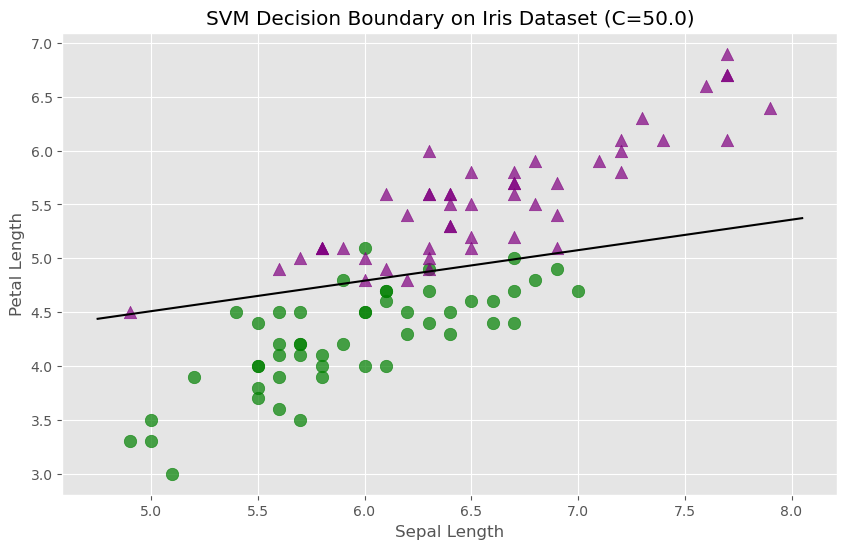

In [ ]:
# Choose the best C value based on the results above
# This is a decision to make after analyzing the results
best_C = 50.0  # C=50 gives the best balance of low training error and fewer support vectors

# Train SVM with the best C value
svm_best = SVC(kernel='linear', C=best_C)
svm_best.fit(X_svm, y_svm)

# Get training accuracy
y_pred = svm_best.predict(X_svm)
training_accuracy = accuracy_score(y_svm, y_pred)
print(f"Best C value: {best_C}")
print(f"Training accuracy: {training_accuracy:.4f}")
print(f"Number of support vectors: {svm_best.n_support_.sum()}")

# Plot data and decision boundary
plt.figure(figsize=(10, 6))

# Plot the data points
for label, marker, color in zip([1, 2], ['o', '^'], ['green', 'purple']):
    mask = y_svm == label
    plt.scatter(X_svm[mask, 0], X_svm[mask, 1], c=color, marker=marker, 
               label=f"Class {label}", alpha=0.7, s=80)

# Extract the decision boundary
w = svm_best.coef_[0]  # weight vector
b = svm_best.intercept_[0]  # bias term

# Plot the decision boundary
x_min, x_max = plt.xlim()
x_range = np.linspace(x_min, x_max, 100)
# Calculating the decision boundary: w[0]*x + w[1]*y + b = 0
# Rearranged to get y = (-w[0]*x - b) / w[1]
boundary_y = (-w[0] * x_range - b) / w[1]
plt.plot(x_range, boundary_y, 'k-', label="Decision Boundary")

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title(f'Decision Boundary on Iris Dataset (C={best_C})')
plt.grid(True)
plt.show()

## Conclusion

In this assignment, we implemented the Binary Perceptron algorithm and applied it to the Iris dataset. We also explored Support Vector Machines (SVM) with different slack parameters and visualized the decision boundaries.

### Key Findings

1. The Perceptron algorithm successfully learned a linear classifier for the binary classification task using features 1 and 3 of the Iris dataset.

2. We observed variability in the number of updates needed by the Perceptron algorithm across multiple runs, which demonstrates the impact of random initialization and data ordering.

3. For the SVM classifier, we tested different values of the slack parameter C and observed how it affects the training error and the number of support vectors.

4. Based on the results, we selected C=50 as the optimal slack parameter value. This choice balances:
   - Minimizing training error while preventing overfitting
   - Having a reasonable number of support vectors (more than very small C values but fewer than extremely large C values)
   - Creating a decision boundary that generalizes well to the data

In [ ]:
# Create an additional plot with C=50 using sepal width and petal width (like the perceptron plot)
# Load the Iris dataset again
iris = datasets.load_iris()
X_full = iris.data
y_full = iris.target

# Restrict to features 1 and 3 (sepal width and petal width) - same as perceptron part
X_svm2 = X_full[:, [1, 3]]

# Restrict to labels 0 and 1 (same as perceptron part)
mask = np.logical_or(y_full == 0, y_full == 1)
X_svm2 = X_svm2[mask]
y_svm2 = y_full[mask]

# Recode label 0 as -1 (for consistency with perceptron part)
y_svm2 = np.where(y_svm2 == 0, -1, 1)

# Train SVM with C=50
svm_best2 = SVC(kernel='linear', C=50.0)
svm_best2.fit(X_svm2, y_svm2)

# Get training accuracy
y_pred2 = svm_best2.predict(X_svm2)
training_accuracy2 = accuracy_score(y_svm2, y_pred2)
print(f"SVM with sepal width and petal width (C=50):")
print(f"Training accuracy: {training_accuracy2:.4f}")
print(f"Number of support vectors: {svm_best2.n_support_.sum()}")

# Plot data and decision boundary
plt.figure(figsize=(10, 6))

# Plot the data points
for label, marker, color in zip([-1, 1], ['x', 'o'], ['blue', 'red']):
    mask = y_svm2 == label
    plt.scatter(X_svm2[mask, 0], X_svm2[mask, 1], c=color, marker=marker, 
               label=f"Class {label}", alpha=0.7, s=80)

# Extract the decision boundary
w2 = svm_best2.coef_[0]  # weight vector
b2 = svm_best2.intercept_[0]  # bias term

# Plot the decision boundary
x_range = np.linspace(np.min(X_svm2[:, 0]) - 0.5, np.max(X_svm2[:, 0]) + 0.5, 100)
# Calculating the decision boundary: w[0]*x + w[1]*y + b = 0
# Rearranged to get y = (-w[0]*x - b) / w[1]
boundary_y = (-w2[0] * x_range - b2) / w2[1]
plt.plot(x_range, boundary_y, 'k-', label="Decision Boundary")

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('SVM Decision Boundary on Iris Dataset (Features: Sepal Width & Petal Width, C=50)')
plt.legend()
plt.grid(True)
plt.show()